In [ ]:
#@title Revisão A - Questão 01:[NP - Cálculo do Retorno Diário]:

# 1) [NP - Cálculo do Retorno Diário]: Dado um array de preços de ações de 5 dias: [100, 110, 105, 115, 120],
# qual linha de código NumPy calcularia o retorno diário?
# Código:
# import numpy as np
# prices = np.array([100, 110, 105, 115, 120])

# a) daily_return = np.sum(prices) / len(prices)
# b) daily_return = np.diff(prices)
# c) daily_return = np.diff(prices) / prices[:-1]
# d) daily_return = prices / np.mean(prices)


import numpy as np
prices = np.array([100, 110, 105, 115, 120])

daily_return_a = np.sum(prices) / len(prices)
daily_return_b = np.diff(prices)
daily_return_c = np.diff(prices) / prices[:-1]
daily_return_d = prices / np.mean(prices)

print(daily_return_a) # Calcula a média dos preços
print(daily_return_b) # Calcula a diferença entre preços consecutivos no array / Representam as mudanças diárias no preço
print(daily_return_c) # ** Calcula a taxa do retorno diário / prices[:-1] são os preços dos dias anteriores (excluindo o último preço)
print(daily_return_d) # Divide cada preço pela média dos preços / Representa cada preço como uma proporção da média


110.0
[10 -5 10  5]
[ 0.1        -0.04545455  0.0952381   0.04347826]
[0.90909091 1.         0.95454545 1.04545455 1.09090909]


In [ ]:
#@title Revisão A - Questão 02:[NP - Cálculo da Média Móvel]:

# 2) [NP - Cálculo da Média Móvel]: Utilizando NumPy, como você calcularia a média móvel de 3 dias de um array de preços de ações?
# Código:
# import numpy as np
# prices = np.array([100, 105, 110, 115, 120])

# a) moving_avg = np.convolve(prices, np.ones(3)/3, mode='valid')
# b) moving_avg = np.cumsum(prices) / 3
# c) moving_avg = np.mean(prices)
# d) moving_avg = np.fft.fft(prices)


import numpy as np
prices = np.array([100, 105, 110, 115, 120])

moving_avg_a = np.convolve(prices, np.ones(3)/3, mode='valid')
moving_avg_b = np.cumsum(prices) / 3
moving_avg_b2 = np.cumsum(prices) # Só para entender o cumsum *
moving_avg_c = np.mean(prices)
moving_avg_d = np.fft.fft(prices)

print(moving_avg_a) # ** Calcula a média móvel simples (SMA) com uma janela de tamanho 3. Isso significa que ele está tomando a média dos preços em grupos de 3.
                    # O método np.convolve faz uma convolução dos preços com um kernel (neste caso, um vetor de três uns divididos por 3) para calcular a média.
                    # np.ones(3)/3 cria um array com três elementos, todos iguais a 1/3. Isso representa os pesos para calcular a média de três valores.
                    # Exemplo do 1º cálculo: (100+105+110)/3 = 315/3 = 105 // Depois (105+110+115)/3 = 330/3 = 110
                    # mode='valid' > determina como o cálculo de convolução deve ser tratado nas bordas.
print(moving_avg_b) # Calcula a soma cumulativa dos preços divididos por 3 /  Isso não é realmente uma média móvel e o resultado provavelmente
                    # não terá um significado direto em termos de análise dos preços.
print(moving_avg_b2)# Só o cumsum para entendimento *
print(moving_avg_c) # Calcula a média dos preços
print(moving_avg_d) # Calcula a Transformada Rápida de Fourier (Fast Fourier Transform, FFT) dos preços.
                    # A FFT é uma maneira de transformar um sinal (neste caso, preços) do domínio do tempo para o domínio da frequência.
                    # O resultado será um array de valores complexos que representam os coeficientes da série no domínio da frequência.


[105. 110. 115.]
[ 33.33333333  68.33333333 105.         143.33333333 183.33333333]
[100 205 315 430 550]
110.0
[550.  +0.j         -12.5+17.20477401j -12.5 +4.0614962j
 -12.5 -4.0614962j  -12.5-17.20477401j]


In [ ]:
#@title OBS: Detalhe parâmetro mode='valid'

# No método np.convolve acima, o parâmetro mode= tem 3 opções a seguir (valid, same e full)

import numpy as np
prices = np.array([100, 105, 110, 115, 120])

moving_avg_valid = np.convolve(prices, np.ones(3)/3, mode='valid')
print(moving_avg_valid)  # só faz o cálculo onde tem valores no array eliminando valores de borda (100+105+110)/3, (105+110+115)/3 e por último (110+115+120)/3

moving_avg_same = np.convolve(prices, np.ones(3)/3, mode='same')
print(moving_avg_same)  # calcula 1 elemento de borda a mais em cada borda (0+100+105)/3 e na outra borda (115+120+0)/3

moving_avg_full = np.convolve(prices, np.ones(3)/3, mode='full')
print(moving_avg_full)  # calcula todos os valores de borda (0+0+100)/3 e no final da borda (120+0+0)/3

[105. 110. 115.]
[ 68.33333333 105.         110.         115.          78.33333333]
[ 33.33333333  68.33333333 105.         110.         115.
  78.33333333  40.        ]


In [ ]:
#@title Revisão A - Questão 03:[PD - dropna]:

# 3) [PD] O que o seguinte código pandas faz?
df.dropna(subset=['ColunaA'], inplace=True)

# a) Substitui os valores NaN na 'ColunaA' por 0
# b) Remove todas as colunas onde 'ColunaA' contém um valor NaN
# c) Substitui os valores NaN na 'ColunaA' pela média da coluna
# d) Remove todas as linhas onde 'ColunaA' contém um valor NaN

# >> Exemplo do dropna na apostila online

# Explicação dos parâmetros:

# subset:

# Esse parâmetro é usado para especificar as colunas nas quais a função dropna() irá atuar.
# No exemplo fornecido, estamos especificando que queremos considerar apenas a coluna nomeada 'ColunaA'.
# A função dropna() verificará se há algum valor NaN (Not a Number, que é a representação padrão de dados ausentes/faltantes no Pandas) na coluna 'ColunaA'.
# Se houver, a linha correspondente será excluída.

# inplace:

# Esse parâmetro determina como a operação afetará o DataFrame original.
# Quando inplace=True, a operação modificará o DataFrame original (df neste caso) e não retornará um novo DataFrame.
# Em outras palavras, após a execução do comando, df já estará atualizado sem as linhas que contêm NaN na coluna 'ColunaA'.
# Se inplace fosse definido como False (ou simplesmente omitido, pois o padrão é False), a operação retornaria um novo DataFrame com as linhas contendo NaN removidas,
# mas o DataFrame original df permaneceria inalterado.

# Resumindo, df.dropna(subset=['ColunaA'], inplace=True) irá remover todas as linhas do DataFrame df que têm um valor NaN na coluna 'ColunaA',
# e essa modificação será feita diretamente no DataFrame original.

In [8]:
#@title Revisão A - Questão 04:[PD - Agrupamento e Agregação]:

# 4) [PD - Agrupamento e Agregação]: Você tem um DataFrame de preços de ações com uma coluna para a empresa e outra para o preço. Como você calcula a média de preço para cada empresa?
# df = pd.DataFrame({'Company': ['A', 'B', 'A', 'B'], 'Price': [100, 200, 150, 250]})

# a) df.mean()
# b) df.groupby('Company').mean()
# c) df.groupby('Company').sum()
# d) df['Price'].mean()

import pandas as pd

df = pd.DataFrame({'Company': ['A', 'B', 'A', 'B'], 'Price': [100, 200, 150, 250]})

df_a = df.mean()
df_b = df.groupby('Company').mean()
df_c = df.groupby('Company').sum()
df_d = df['Price'].mean()

print("Opção a:", df_a)
print("\nOpção b:", df_b)
print("\nOpção c:", df_c)
print("\nOpção d:", df_d)


Opção a: Price    175.0
dtype: float64

Opção b:          Price
Company       
A        125.0
B        225.0

Opção c:          Price
Company       
A          250
B          450

Opção d: 175.0


<ipython-input-8-2e5fd04744ef>:15: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_a = df.mean()


In [10]:
#@title Revisão A - Questão 05:[PD - Filtragem de Dados]:

# 5) [PD - Filtragem de Dados]: Considere o DataFrame abaixo contendo informações de preço de ações para duas empresas em diferentes datas.
# Código:
# import pandas as pd
# data = {'Date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04'],
#         'Company_A': [100, 101, 102, 103],
#         'Company_B': [200, 201, 202, 203]}
# df = pd.DataFrame(data)

# Como você filtra o DataFrame para mostrar apenas as linhas onde Company_A tem um preço maior que 101?

# a) df[df['Company_A’] > 101]
# b) df.query(“Company_A > 101”)
# c) df.loc[df[‘Company_A’] > 101]
# d) Todas as opções acima estão corretas

import pandas as pd

data = {'Date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04'],
        'Company_A': [100, 101, 102, 103],
        'Company_B': [200, 201, 202, 203]}
df = pd.DataFrame(data)

df_a = df[df["Company_A"] > 101]
df_b = df.query("Company_A > 101")
df_c = df.loc[df["Company_A"] > 101]

print("Opção a:", df_a)
print("\nOpção b:", df_b)
print("\nOpção c:", df_c)

Opção a:          Date  Company_A  Company_B
2  2023-01-03        102        202
3  2023-01-04        103        203

Opção b:          Date  Company_A  Company_B
2  2023-01-03        102        202
3  2023-01-04        103        203

Opção c:          Date  Company_A  Company_B
2  2023-01-03        102        202
3  2023-01-04        103        203


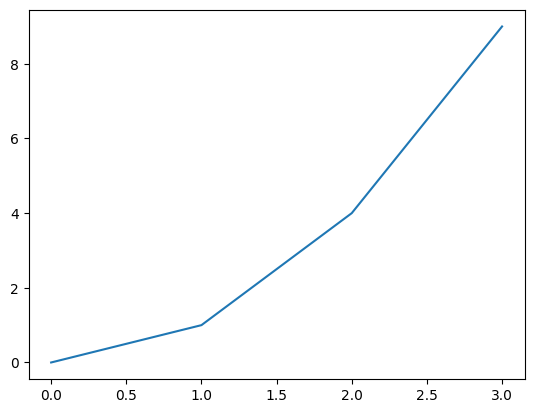

In [13]:
#@title Revisão B - Questão 02:[PD - Filtragem de Dados]:

import matplotlib.pyplot as plt
x = [0, 1, 2, 3]
y = [0, 1, 4, 9]
plt.plot(x, y)
